In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
race_x = pd.read_pickle("data/race_x.pkl").values
race_y = pd.read_pickle("data/race_y.pkl").values
len(race_y)

57768

In [3]:
print(len(race_x[0]))
print(len(race_y[0]))

29
2


In [4]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(race_x, race_y, train_size=0.7)

In [19]:
def learningModel(dim_1, dim_2, dim_3, batch_size, epochs):
    n_in = len(race_x[0])  # 入力層のニューロン数
    n_out = len(race_y[0]) # 出力層のニューロン数

    # 入力層、中間層、出力層の３層のニューラルネットワークを構築する
    model = Sequential()

    #中間層を追加する。最初に層を追加するときはinput_shapeを設定すること。
    #input_shapeのところには形状を入れるため
    # 活性化関数にシグモイド関数
    model.add(Dense(dim_1, input_dim=n_in, activation="relu"))
    model.add(Dense(dim_2, input_dim=dim_1, activation="relu"))
    model.add(Dense(dim_3, input_dim=dim_2, activation="relu"))

    #出力層を追加する
    model.add(Dense(n_out, activation="sigmoid"))  

    # 損失関数に二乗誤差、最適化アルゴリズムにAdamを使用する
    model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=['accuracy'])  

    #学習開始
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)
    score = model.evaluate(x_test, y_test, batch_size=batch_size)
    print("Test score", score[0])
    print("Test accuracy", score[1])
    return model, history, score

In [20]:
model, history, score = learningModel(20, 17, 19, 128, 20)

Epoch 1/20
316/316 [==============================] - 0s 504us/step - loss: 0.7444 - accuracy: 0.6079
Epoch 2/20
316/316 [==============================] - 0s 485us/step - loss: 0.6386 - accuracy: 0.6368
Epoch 3/20
316/316 [==============================] - 0s 486us/step - loss: 0.6242 - accuracy: 0.6565
Epoch 4/20
316/316 [==============================] - 0s 485us/step - loss: 0.6105 - accuracy: 0.6713
Epoch 5/20
316/316 [==============================] - 0s 486us/step - loss: 0.6017 - accuracy: 0.6824
Epoch 6/20
316/316 [==============================] - 0s 489us/step - loss: 0.5984 - accuracy: 0.6862
Epoch 7/20
316/316 [==============================] - 0s 489us/step - loss: 0.5953 - accuracy: 0.6902
Epoch 8/20
316/316 [==============================] - 0s 489us/step - loss: 0.5926 - accuracy: 0.6891
Epoch 9/20
316/316 [==============================] - 0s 486us/step - loss: 0.5910 - accuracy: 0.6914
Epoch 10/20
316/316 [==============================] - 0s 495us/step - loss: 0.591

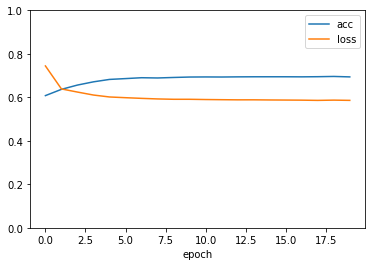

In [21]:
plt.plot(history.epoch, history.history["accuracy"], label="acc")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.xlabel("epoch")
plt.ylim(0.00, 1.00)
plt.legend()

In [15]:
print(type(x_train[1]))
targets = x_train[6].tolist()
prediction = model.predict([targets]).flatten()

<class 'numpy.ndarray'>


In [16]:
print(prediction)
print(targets)

[0.6037957 0.3950347]
[2.0, 4.0, 2.0, 3.92, 100.06, 3.0, 3.0, 1.0, 6.0, 21.0, 117.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
